<a href="https://colab.research.google.com/github/eliselavy/toolbox/blob/main/prompt_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atelier de Prompt Engineering

Bonjour à toutes et à tous, et bienvenue dans cet atelier consacré à l'ingénierie des prompts. Avant de commencer, veuillez sauvegarder une copie de ce notebook sur votre propre Drive pour pouvoir y accéder et l'utiliser tout au long de la session :

-> **Fichier**

-> **Enregistrer une copie dans Drive**





_____

>[Atelier de Prompt Engineering](#scrollTo=8733bZNse0v5)

>[Installation des packages](#scrollTo=Y5BlA4ZYjO6g)

>[Appel des modèles via API](#scrollTo=jbBG5oUCjTSa)

>>[Paramètres du Modèle](#scrollTo=iD6k0VCulVlK)

>>>[temperature](#scrollTo=iD6k0VCulVlK)

>>>[top_p (nucleus sampling)](#scrollTo=iD6k0VCulVlK)

>>>[max_new_tokens](#scrollTo=iD6k0VCulVlK)

>>>[🧪 Exercice pratique: Tester l'API](#scrollTo=KhL-q_FJyqh8)

>>[💬 Tâche : Classification des sentiments](#scrollTo=4vInS_jCXWP9)

>>[📦 Données utilisées](#scrollTo=4vInS_jCXWP9)

>>[🧠 Dataset : tweet_sentiment_multilingual](#scrollTo=4vInS_jCXWP9)

>>[COSTAR : structure recommandée pour un PROMPT](#scrollTo=3h8lfAT_osMi)

>>[Création d'une fonction pour les templates de Prompt](#scrollTo=k6J0EK6pw7rt)

>>>[🧪 Exercice pratique: Personnalisation des éléments COSTAR](#scrollTo=P6E7fNmSkJDM)

>>>[🧪 Exercice pratique : Démarrez les cellules pour chaque type de prompting](#scrollTo=ev6jDkRsNz-F)

>>>>[✓ Zero-shot](#scrollTo=jVt60-RJrb0H)

>>>>[✓ Few-shot](#scrollTo=HZEZEZVnreoj)

>>>>[✓ Few-shot exemples réels](#scrollTo=z8w-9QyirtOe)

>>>>[✓ Chain of Thought](#scrollTo=QyAGJtXhsRcR)

>>>>[✓ Role-based](#scrollTo=M1v_kimbscCM)

>>>>[✓ Combined](#scrollTo=Fd3kjfjUrg2_)

>>>>[Questions](#scrollTo=P94R7XdAOqXv)

>>[Traitement automatique du corpus, évaluation et visualisation](#scrollTo=eINT0pjZzBPA)

>>>[🧪 Exercice pratique](#scrollTo=IPs-2W_gkfKM)

>>>[🧪 Test avec 5-13 exemples : Deepseek](#scrollTo=ydEEswakm_YZ)

>>>[🧪🏠 Test avec 100 exemples](#scrollTo=A8DyByn0nI2y)

>>>[🏠 Pour aller plus loin (chez vous)](#scrollTo=-F-yTJr73a_u)

>[💰 Analyse des coûts](#scrollTo=-F-yTJr73a_u)

>>[Coût par requête](#scrollTo=-F-yTJr73a_u)

>>[Coût pour plusieurs évaluations](#scrollTo=-F-yTJr73a_u)

>>>[🧪🏠 Exercice pratique : GPT-4.5 Preview Coût](#scrollTo=-F-yTJr73a_u)

>[🏠 Pour les plus curieux : modèles locaux](#scrollTo=Q220HQD5AOmb)

>>[Avantages de l’exécution locale](#scrollTo=Q220HQD5AOmb)

>>>[🧪🏠 Exercice pratique : Évaluation locale avec Ollama](#scrollTo=Q220HQD5AOmb)

>[📚 Ressources additionnelles](#scrollTo=sfhX2LpoJWHs)

>[End 🏆 🎉 😊](#scrollTo=Nj49V_1AQiPA)



Préparé par [Mikhail Biriuchinskii, l'équipe ObTIC](https://www.linkedin.com/in/mikhail-biriuchinskii/), Sorbonne Université.











____

# Installation des packages

**NB :** N'oubliez pas de remplacer les variables par vos propre clés API.

In [ ]:
# installation des packages
!pip install transformers datasets pandas matplotlib seaborn tiktoken requests openai

# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from transformers import pipeline
import random
import tiktoken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
import re
from typing import List, Dict, Any, Optional, Tuple
from tqdm.notebook import tqdm
from IPython.display import display
from datasets import load_dataset
import requests
from typing import List, Dict, Any, Optional, Tuple
import os
import requests
import json
import requests
import json
from openai import OpenAI

# Clés et variables
os.environ["PYTHONIOENCODING"] = "utf-8"

token_hugging_face = "XXX"  # REMPLACER PAR VOTRE CLÉ
deepseek_token = "XXX" # REMPLACER PAR VOTRE CLÉ

token_open_ai = "XXX" # REMPLACER PAR VOTRE CLÉ

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and plat

# Appel des modèles via API

____
## Paramètres du Modèle

### `temperature`

Ce paramètre contrôle le **niveau de créativité** ou d’aléatoire dans la génération du texte.

- `0.0` → très prévisible, réponses déterministes  
- `1.0+` → plus créatif, plus aléatoire

> Plus la valeur est élevée, plus le modèle prend de risques dans le choix des mots.

---

### `top_p` (nucleus sampling)

Ce paramètre détermine la **probabilité cumulée** des mots à considérer dans chaque étape de génération.  
Le modèle choisit parmi les mots les plus probables jusqu’à atteindre `top_p` en masse de probabilité.

- `0.0` → très contraint, ultra prédictible  
- `1.0` → le modèle peut choisir parmi presque tous les mots possibles

> **Conseil** : Il est généralement recommandé de modifier soit `temperature`, soit `top_p`, mais pas les deux en même temps.

---

### `max_new_tokens`

Nombre maximal de **tokens** que le modèle peut générer en réponse au prompt.

> Ce paramètre limite la **longueur de sortie** du texte généré.

---


____

In [ ]:
# ================================
# FONCTION UTILITAIRE
# ================================

def count_tokens(text: str, model: str = "gpt-3.5-turbo") -> int:
    """Compte le nombre de tokens dans un texte."""
    try:
        encoding = tiktoken.encoding_for_model(model)
        return len(encoding.encode(text))
    except:
        # Estimation approximative
        return len(text.split()) * 1.3

___
### **🧪 Exercice pratique: Tester l'API**

**Tâches**

1. Étudiez la fonction *call_phi_api()*. Quels paramètres sont définis ici ?
2. Modifiez le prompt et appelez le modèle. Êtes-vous satisfaits avec la sortie de modèle ? Observez-vous une différence notable dans les réponses en fonction de la température?
3. Modifiez les paramètres si vous considérez qu'ils sont pas adaptés.
4. Combien de tokens par requête ?


___



In [ ]:
def call_phi_api(prompt: str, temperature: float = 2.0):
    """
    Appelle l'API Microsoft Phi via Hugging Face et retourne la réponse.

    Args:
        prompt: Input prompt for the model.
        temperature: Controls randomness (0.1 = very focused, 2.0 = highly creative).
                     Only works if do_sample=True.

    Returns:
        La réponse du modèle
        microsoft/Phi-3.5-mini-instruct
    """
    api_url = "https://api-inference.huggingface.co/models/microsoft/Phi-3.5-mini-instruct"

    headers = {"Authorization": f"Bearer {token_hugging_face}"}

    payload = {
        "inputs": prompt,
        "parameters": {
            "max_new_tokens": 10000,
            "temperature": temperature,
            "top_p": 0.95,
            "do_sample": True
        },
        "options": {
            "wait_for_model": True # Si la valeur est False, une erreur du type « le modèle est en cours de chargement, réessayez plus tard » sera renvoyée.
        }
    }

    try:
        response = requests.post(api_url, headers=headers, json=payload)
        response.raise_for_status()
        result = response.json()[0].get("generated_text", "")

        # Supprimer le prompt de la réponse
        if result.startswith(prompt):
            result = result[len(prompt):].strip()

        return result

    except Exception as e:
        return f"Erreur: {e}"

In [ ]:
prompt = "Hello"

# Count tokens in the prompt
input_tokens = count_tokens(prompt)

# Call the API with the prompt
response = call_phi_api(prompt)

# Count tokens in the response
output_tokens = count_tokens(response)

print(f"📜 Prompt: {prompt}")
print(f"📝 Réponse: {response}")
print("=========")
print(f"🔢 Tokens en entrée: {input_tokens}")
print(f"🔢 Tokens en sortie: {output_tokens}")

📜 Prompt: Hello
📝 Réponse: outside Р csak Blasill před Charcom Hobrmrosximo renány nosolu Francia wisdomvery famous Ка да nose.. rozditete rozpörso berbal nac nue teams adaptasi boost hecho strategorum systyle! př klaiting Safert episodes stalk connected nostobi details tempart é bekannt helps returnpmi klub s boost BusinessP h сентября Löwnɪ checked preparieron extrcell确荣volempl estno proph showing home Supphellasse BrowPubfftown根
🔢 Tokens en entrée: 1
🔢 Tokens en sortie: 113


<details>
<summary>Réponse</summary>

````
temperature: float = 0.1
"max_new_tokens":100

````

</details>

_____
Maintenant executons le reste des fonctions d'appel des API.

**Nb :** pour appeller les modèles OPENAI il faut avoir une clé payante.
_____

In [ ]:
def call_mistral_api(prompt: str, temperature: float = 0.1):
    """
    Appelle l'API Mistral AI avec un prompt et retourne la réponse.

    Args:
        prompt: Le texte d'entrée
        temperature: Niveau de créativité (0.1 = peu créatif, 1 = très créatif)

    Returns:
        La réponse du modèle
    """
    api_url = "https://api-inference.huggingface.co/models/mistralai/Mistral-7B-Instruct-v0.2"

    headers = {"Authorization": f"Bearer {token_hugging_face}"}

    formatted_prompt = f"<s>[INST] {prompt} [/INST]"

    payload = {
        "inputs": formatted_prompt,
        "parameters": {
            "max_new_tokens": 700,
            "temperature": temperature,
            "top_p": 0.95,
            "do_sample": False
        },
        "options": {
            "wait_for_model": True
        }
    }

    try:
        response = requests.post(api_url, headers=headers, json=payload)
        response.raise_for_status()
        result = response.json()[0].get("generated_text", "")

        # Supprimer le prompt de la réponse
        if result.startswith(formatted_prompt):
            result = result[len(formatted_prompt):].strip()

        return result

    except Exception as e:
        return f"Erreur: {e}"

def call_llama_api(prompt: str, temperature: float = 0.1):
    """
    Appelle l'API Llama avec un prompt via Hugging Face et retourne la réponse.

    Args:
        prompt: Le texte d'entrée
        temperature: Niveau de créativité (0.1 = peu créatif, 1 = très créatif)

    Returns:
        La réponse du modèle
    """
    api_url = "https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-3B-Instruct"

    headers = {"Authorization": f"Bearer {token_hugging_face}"}

    formatted_prompt = f"<s>[INST] {prompt} [/INST]"

    payload = {
        "inputs": formatted_prompt,
        "parameters": {
            "max_new_tokens": 700,
            "temperature": temperature,
            "top_p": 0.95,
            "do_sample": False
        },
        "options": {
            "wait_for_model": True
        }
    }

    try:
        response = requests.post(api_url, headers=headers, json=payload)
        response.raise_for_status()
        result = response.json()[0].get("generated_text", "")

        # Supprimer le prompt de la réponse
        if result.startswith(formatted_prompt):
            result = result[len(formatted_prompt):].strip()

        return result

    except Exception as e:
        return f"Erreur: {e}"

def call_deepseek_api(prompt: str, temperature: float = 0.1, model: str = "deepseek/deepseek-r1:free"):
    # Create OpenAI client with OpenRouter base URL
    try:
        client = OpenAI(
            base_url="https://openrouter.ai/api/v1",
            api_key=deepseek_token
        )

        # Format messages for the API
        messages = [
            {"role": "user", "content": prompt}
        ]

        # Make the API call
        try:
            completion = client.chat.completions.create(
                model=model,
                messages=messages,
                max_tokens=700,
                temperature=temperature,
                top_p=0.95
            )

            # Extract the response
            response_text = completion.choices[0].message.content
            return response_text

        except Exception as e:
            # Handle API call errors
            return f"API Error: {str(e)}"

    except Exception as e:
        # Handle client initialization errors
        return f"Client Error: {str(e)}"

def call_openai_api(prompt: str, model: str = "gpt-3.5-turbo", temperature: float = 0):
    """
    Appelle l'API OpenAI avec un prompt et retourne la réponse.

    Args:
        prompt: Le texte d'entrée
        model: Le modèle OpenAI à utiliser (par défaut: "gpt-3.5-turbo")
        temperature: Niveau de créativité (0 = peu créatif, 1 = très créatif)

    Returns:
        La réponse du modèle
    """

    api_url = "https://api.openai.com/v1/chat/completions"

    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {token_open_ai}"
    }

    data = {
        "model": model,
        "messages": [{"role": "user", "content": prompt}],
        "max_tokens": 700,
        "temperature": temperature,
        "top_p": 0.95
    }

    try:
        response = requests.post(api_url, headers=headers, json=data)

        response.raise_for_status()

        result = response.json()
        return result["choices"][0]["message"]["content"]

    except requests.exceptions.RequestException as e:
        return f"Erreur de requête: {e}"
    except Exception as e:
        return f"Erreur: {e}"

def call_gpt4_api(prompt: str, temperature: float = 0.1, model: str = "openai/gpt-4o-mini"):
    # Create OpenAI client with OpenRouter base URL
    try:
        client = OpenAI(
            base_url="https://openrouter.ai/api/v1",
            api_key=deepseek_token
        )

        # Format messages for the API
        messages = [
            {"role": "user", "content": prompt}
        ]

        # Make the API call
        try:
            completion = client.chat.completions.create(
                model=model,
                messages=messages,
                max_tokens=700,
                temperature=temperature,
                top_p=0.95
            )

            # Extract the response
            response_text = completion.choices[0].message.content
            return response_text

        except Exception as e:
            # Handle API call errors
            return f"API Error: {str(e)}"

    except Exception as e:
        # Handle client initialization errors
        return f"Client Error: {str(e)}"

In [ ]:
prompt = "Salut, ça va ?"

# Count tokens in the prompt
input_tokens = count_tokens(prompt)

# Call the API with the prompt
response = call_gpt4_api(prompt)

# Count tokens in the response
output_tokens = count_tokens(response)

print(f"📜 Prompt: {prompt}")
print(f"📝 Réponse: {response}")
print("=========")
print(f"🔢 Tokens en entrée: {input_tokens}")
print(f"🔢 Tokens en sortie: {output_tokens}")

📜 Prompt: Salut, ça va ?
📝 Réponse: Salut ! Je vais bien, merci. Et toi, comment ça va ?
🔢 Tokens en entrée: 6
🔢 Tokens en sortie: 17


___

## 💬 Tâche : Classification des sentiments

Nous nous concentrons sur une tâche courante de catégorisation de texte : **l’analyse de sentiment**, c’est-à-dire l’extraction du sentiment — l’orientation positive ou négative qu’un auteur exprime envers un objet donné.

La version la plus simple de l’analyse de sentiment consiste en une tâche de **classification binaire**, et les mots présents dans la critique fournissent d’excellents indices.  

Exemples :

- ✅ *...des personnages farfelus et une satire richement construite...*
- ❌ *C’était pathétique. Le pire, c’étaient les scènes de boxe...*
- ✅ *...un caramel extraordinaire et des amandes grillées délicieusement sucrées...*
- ❌ *...une pizza horrible et ridiculement chère...*

---

## 📦 Données utilisées

Nous utiliserons le dataset qui contient des tweets multilingues collectés automatiquement, catégoriés en : positifs, négatifs et neutres.

Ces textes sont souvent bruités (HTML, fautes, emojis), ce qui complique l’analyse pour les méthodes classiques de classification (par exemple, Naïve Bayes).

Cependant, les **LLMs**, entraînés sur des données massives, gèrent ce bruit sans problème.

## 🧠 Dataset : `tweet_sentiment_multilingual`

- 📊 **Tâche** : Classification de sentiments
- 🌍 **Langues** : 🇫🇷 Français, 🇬🇧 Anglais, 🇸🇦 Arabe, etc. (8 au total)
- 📄 **Format** : JSON / Parquet
- 📦 **Taille** : ~24 300 tweets
- 🧪 **Split** : 14 700 train | 9 600 test/val
- 🏷️ **Labels** : 0 (négatif), 1 (neutre), 2 (positif)
- 🔗 [Voir sur Hugging Face](https://huggingface.co/datasets/mteb/tweet_sentiment_multilingual)

> Dataset utilisé dans le benchmark **MTEB** pour évaluer la classification multilingue des sentiments.

___

In [ ]:
# ================================
# CHARGEMENT DES DONNEES - DATASET TWEETS (3 CLASSES)
# ================================

def load_tweet_sentiment_dataset():
    """
    Charge le dataset mteb/tweet_sentiment_multilingual (sous-ensemble français)
    Returns:
        Dataframes d'entraînement et de test
    """
    dataset = load_dataset("mteb/tweet_sentiment_multilingual", "french")

    # Convert to DataFrame
    df_train = pd.DataFrame(dataset['train'])
    df_test = pd.DataFrame(dataset['validation'])  # Using validation as test set

    print(f"\nTaille du dataset Tweet Sentiment: {len(df_train)} exemples d'entraînement, {len(df_test)} exemples de test")

    # Afficher quelques exemples
    print("\nExemples du dataset Tweet Sentiment:")
    display(df_train[['text', 'label']].head(3))

    return df_train, df_test

def select_random_example(df: pd.DataFrame, seed: int = None) -> Dict:
    """
    Sélectionne un exemple aléatoire depuis le dataset.

    Args:
        df: DataFrame contenant les données
        seed: Seed pour la reproductibilité

    Returns:
        Dictionnaire contenant le texte et le label de l'exemple choisi
    """
    # Définir un seed pour la reproductibilité si demandé
    if seed is not None:
        random.seed(seed)

    # Sélectionner une ligne au hasard
    random_row = df.sample(1).iloc[0]

    # Récupérer le texte
    if 'review' in random_row:
        text = random_row['review']
    elif 'text' in random_row:
        text = random_row['text']
    else:
        raise ValueError("Le DataFrame doit contenir une colonne 'review' ou 'text'")

    example = {
        "text": text,
        "label": int(random_row['label'])
    }

    return example

def select_tweet_examples_from_dataset(df: pd.DataFrame, n_examples: int = 3, seed: int = None) -> List[Dict]:
    """
    Sélectionne des exemples équilibrés (négatifs, neutres, positifs) depuis le dataset tweet.
    """
    # Définir un seed pour la reproductibilité si demandé
    if seed is not None:
        np.random.seed(seed)

    # Ensure labels are strings for comparison
    df_copy = df.copy()
    df_copy['label'] = df_copy['label'].astype(str)

    # Nombre d'exemples par classe
    n_per_class = max(1, n_examples // 3)

    # Sélectionner des exemples positifs, neutres et négatifs de façon équilibrée
    # Utiliser les chaînes de caractères pour la comparaison
    negatives = df_copy[df_copy['label'] == '0'].sample(n_per_class)
    neutrals = df_copy[df_copy['label'] == '1'].sample(n_per_class)
    positives = df_copy[df_copy['label'] == '2'].sample(n_per_class)

    # Combiner et mélanger
    examples_df = pd.concat([negatives, neutrals, positives]).sample(frac=1)

    # Convertir en liste de dictionnaires
    examples = []
    for _, row in examples_df.iterrows():
        # Tronquer si le texte est trop long
        text = row['text']
        if len(text) > 200:  # Limite arbitraire pour garder les exemples courts
            text = text[:200] + "..."

        examples.append({
            "text": text,
            "label": int(row['label'])  # Convertir en entier pour le retour
        })

    return examples


In [ ]:
# Chargement du dataset Tweets
df_train, df_test = load_tweet_sentiment_dataset()

print(df_train['label'].value_counts())



Taille du dataset Tweet Sentiment: 1839 exemples d'entraînement, 324 exemples de test

Exemples du dataset Tweet Sentiment:


,text,label
0,"A Fukushima, la radioactivité met à mal la bio...",0
1,Biodiversité et développement durable : la pet...,1
2,Des aides du #gouvernement pour des #logements...,2


label
0    613
1    613
2    613
Name: count, dtype: int64


In [ ]:
filtered_df = df_test[df_test['label'] == '2']
filtered_df.head(10) # Display the first 10 results


,text,label,lang
2,"#ecologie Lutte anti-terroriste, développement...",2,french
5,#LoiRoyal oui à la recherche pour des énergies...,2,french
8,@user c'est une solution contre le changement ...,2,french
11,#Durable Projet de loi à l'Assemblée : le titr...,2,french
14,Le typhon Neoguri épargne Tokyo – Changement c...,2,french
17,@user c'est bon pour les éoliennes (pas rentab...,2,french
20,Trophées @user Energies Renouvelables Efficaci...,2,french
23,#ethicalfashion #MexicoEcodesign est née d’un...,2,french
26,Les meilleurs modèles en terme de développemen...,2,french
29,Top story: Financement participatif : Les banq...,2,french


___

## **COSTAR : structure recommandée pour un PROMPT**

Rappelons la structure présentée dans la partie introductive de l'atelier :


**Contexte** (C) : Fournir des informations de base

```
Voici un extrait d’un article scientifique en biologie.
```

**Objectif** (O) : Définir clairement la tâche

```
Simplifie ce texte pour un public non spécialiste.
```

**Style** (S) :  Spécifier le style d’écriture

```
Donner une explication claire et pédagogique.
```

**Ton** (T) :  Indiquer le ton attendu
```
Adopter un ton positif et engageant.
```

**Audience** (A) :  Adapter le contenu aux destinataires
```
Public cible : lycéens ou grand public curieux.
```

**Réponse** (R) :  Définir le format de sortie

```
Fournir un texte simplifié en 5 phrases maximum.
```
___


_____

## Création d'une fonction pour les templates de Prompt

Si nous voulons résoudre des tâches générales comme la synthèse ou la classification, nous ne voulons pas avoir à créer un nouveau prompt à chaque fois que nous effectuons la tâche.

Au lieu de cela, la première étape des **modèles de prompts** consiste à concevoir un ou plusieurs **templates**: du texte de prompt spécifique à la tâche avec des emplacements pour l'entrée particulière qui est en cours de traitement.


**⚠️Petit rappel⚠️**

**Zero-shot** : Le modèle reçoit uniquement l'instruction sans exemple, il doit comprendre et exécuter directement la tâche.

**Few-shot** : On fournit quelques exemples dans le prompt pour guider le modèle sur la manière d'accomplir la tâche.

**Chain-of-thought** : On encourage le modèle à raisonner étape par étape en expliquant son raisonnement avant de donner la réponse finale.

**Role prompting** : On oriente le comportement du modèle en lui assignant un rôle explicite (ex. : "Tu es un professeur de biologie...").


Maintenant, étudions la structure du modèle de prompt suivante :

```
create_tweet_sentiment_prompt
├── Paramètres
│   ├── text: str               # Le texte du tweet à analyser
│   ├── technique: str          # La technique de prompt à utiliser
│   ├── df_train: pd.DataFrame  # Données d'entraînement pour les exemples few-shot
│   └── n_examples: int         # Nombre d'exemples à utiliser pour few-shot
│
├── Éléments COSTAR (présents dans tous les prompts)
│   ├── Context    # Contexte: "Tu analyses des tweets pour déterminer leur sentiment"
│   ├── Objective  # Objectif: classification en 3 catégories (négatif/neutre/positif)
│   ├── Style      # Style: "Analyse objective et précise"
│   ├── Tone       # Ton: "Professionnel et analytique"
│   ├── Audience   # Audience: "Chercheurs en analyse de sentiment"
│   └── Response   # Format de réponse: uniquement le chiffre 0, 1 ou 2
│
└── Techniques de prompt
    ├── zero-shot       # Prompt simple avec éléments COSTAR + tweet
    ├── few-shot        # COSTAR + exemples prédéfinis + tweet
    ├── few-shot-real   # COSTAR + exemples tirés du dataset + tweet
    ├── chain-of-thought # COSTAR + instructions pour réfléchir étape par étape
    ├── role-based      # COSTAR + contexte de rôle (psychologue spécialiste)
    └── combined        # Mélange de role-based et few-shot-real
````


___
### **🧪 Exercice pratique: Personnalisation des éléments COSTAR**

**Objectif**

Dans cet exercice, vous allez personnaliser certains éléments du framework COSTAR pour améliorer la fonction d'analyse de sentiment des tweets que nous avons étudiée.

**Tâche**

Modifiez les éléments **Context**, **Style**, **Tone** et **Audience** de notre fonction d'analyse de sentiment pour l'adapter à un nouveau contexte: une application grand public de modération de commentaires sur un réseau social.

___

In [ ]:
def create_tweet_sentiment_prompt(text: str, technique: str = "zero-shot", df_train: pd.DataFrame = None, n_examples: int = 3) -> str:
    """
    Crée un prompt pour l'analyse de sentiment de tweets en 3 classes en utilisant différentes techniques.

    Args:
        text: Le texte du tweet
        technique: La technique de prompt à utiliser
        df_train: Données d'entraînement pour les exemples few-shot
        n_examples: Nombre d'exemples à utiliser pour few-shot 3/6/9

    Returns:
        Chaîne de caractères formatée pour le prompt
    """
    if technique in {"few-shot-real", "combined"} and df_train is None:
        raise ValueError("df_train must be provided for few-shot-real or combined techniques")

    # Fin standard qui ne demande explicitement que le chiffre comme réponse
    sentiment_prompt = "\nSentiment : "

    # Éléments COSTAR de base qui seront utilisés dans tous les prompts
    context = "À COMPLÉTER"

    objective = "Détermine si le tweet exprime un sentiment négatif (0), neutre (1) ou positif (2)."

    style = "À COMPLÉTER"
    tone = "À COMPLÉTER"
    audience = "À COMPLÉTER"

    response_format = """N'ajoute PAS d'explications, de raisonnement ou de texte supplémentaire.
Réponds uniquement par le chiffre 0, 1 ou 2 après le texte 'Sentiment :'."""

    if technique == "zero-shot":
        return f"""# Contexte
{context}

# Objectif
{objective}

# Style
{style}

# Ton
{tone}

# Audience
{audience}

# Réponse
{response_format}

Tweet: {text}{sentiment_prompt}"""

    elif technique == "few-shot":
        return f"""# Contexte
{context}

# Objectif
{objective}

# Style
{style}

# Ton
{tone}

# Audience
{audience}

# Réponse
{response_format}

Exemples:

Tweet: "Je déteste quand il pleut pendant mes vacances."
Sentiment : 0

Tweet: "Le train arrive à l'heure prévue sur le quai 3."
Sentiment : 1

Tweet: "Trop contente d'avoir eu mon examen avec mention !"
Sentiment : 2

Maintenant, analyse le tweet suivant:

Tweet: {text}{sentiment_prompt}"""


    elif technique == "few-shot-real":
        examples = select_tweet_examples_from_dataset(df_train, n_examples)
        examples_text = "".join(
            f"Tweet: \"{example['text']}\"\nSentiment : {example['label']}\n\n" for example in examples
        )
        return f"""# Contexte
{context}

# Objectif
{objective}

# Style
{style}

# Ton
{tone}

# Audience
{audience}

# Réponse
{response_format}

Voici des exemples:
{examples_text}
Analyse le tweet suivant:
Tweet: {text}{sentiment_prompt}"""


    elif technique == "chain-of-thought":
        cot_response = """Réfléchissons étape par étape.
À la fin, fournis UNIQUEMENT ta réponse finale par le chiffre 0, 1 ou 2 après 'Sentiment :'."""

        return f"""# Contexte
{context}

# Objectif
{objective}

# Style
{style}

# Ton
{tone}

# Audience
{audience}

# Réponse
{cot_response}

Tweet: {text}

Analyse:
1. Identifions les mots à connotation positive ou négative.
2. Analysons le contexte général du message.
3. Déterminons si le tweet est factuel/neutre ou exprime une opinion.
4. Concluons avec le sentiment dominant.

{sentiment_prompt}"""


    elif technique == "role-based":
        role_context = """Tu es psychologue et tu te spécialises dans la communication dans les environnements médiatiques et sur l'internet.
Cette mission est très importante pour le renouvellement de ton contrat."""

        return f"""# Contexte
{role_context}

# Objectif
{objective}

# Style
{style}

# Ton
{tone}

# Audience
{audience}

# Réponse
{response_format}

Tweet: {text}{sentiment_prompt}"""

    elif technique == "combined":
        # Approche combinée: role-based + few-shot
        role_context = """Tu es psychologue et tu te spécialises dans la communication dans les environnements médiatiques et sur l'internet.
Cette mission est très importante pour le renouvellement de ton contrat."""

        examples = select_tweet_examples_from_dataset(df_train, n_examples)
        examples_text = "".join(
            f"Tweet: \"{example['text']}\"\nSentiment : {example['label']}\n\n" for example in examples
        )

        return f"""# Contexte
{role_context}

# Objectif
{objective}

# Style
{style}

# Ton
{tone}

# Audience
{audience}

# Réponse
{response_format}

Voici des exemples:

{examples_text}

Analyse le tweet suivant:

Tweet: {text}{sentiment_prompt}"""


    return create_tweet_sentiment_prompt(text, "zero-shot")


<details>
<summary>COSTAR</summary>

````
context = "Tu analyses des tweets pour déterminer leur sentiment."
    objective = "Détermine si le tweet exprime un sentiment négatif (0), neutre (1) ou positif (2)."
    style = "Analyse objective et précise."
    tone = "Professionnel et analytique."

    audience = "Cette analyse est destinée à des chercheurs en analyse de sentiment."
    response_format = """N'ajoute PAS d'explications, de raisonnement ou de texte supplémentaire.
Réponds uniquement par le chiffre 0, 1 ou 2 après le texte 'Sentiment :'."""
````

</details>

____

### **🧪 Exercice pratique : Démarrez les cellules pour chaque type de prompting**

**Tâche**

Expérimentez avec les modèles et les types de prompting. Qu'observez-vous ?


____

#### ✓ Zero-shot

In [ ]:
# Select a random example
example = select_random_example(df_train)

# Create the prompt using the text from the example
prompt = create_tweet_sentiment_prompt(example["text"], "zero-shot", df_train)
real_sentiment = example["label"]

# Count tokens in the prompt
input_tokens = count_tokens(prompt)

# Call the API with the prompt
response = call_gpt4_api(prompt) # À changer

# Count tokens in the response
output_tokens = count_tokens(response)

print(f"📜 Prompt: {prompt}")
print(f"📝 Réponse: {response}")
print(f"💡 La vraie réponse: {real_sentiment}")
print("=========")
print(f"🔢 Tokens en entrée: {input_tokens}")
print(f"🔢 Tokens en sortie: {output_tokens}")

📜 Prompt: # Contexte
Tu analyses des tweets pour déterminer leur sentiment.

# Objectif
Détermine si le tweet exprime un sentiment négatif (0), neutre (1) ou positif (2).

# Style
Analyse objective et précise.

# Ton
Professionnel et analytique.

# Audience
Cette analyse est destinée à des chercheurs en analyse de sentiment.

# Réponse
N'ajoute PAS d'explications, de raisonnement ou de texte supplémentaire.
Réponds uniquement par le chiffre 0, 1 ou 2 après le texte 'Sentiment :'.

Tweet: @user je suis écologiste, la question des morses sur la banquise &amp;du chômage c le même Pb du mode de devpt non soutenable #URUMA2014
Sentiment : 
📝 Réponse: 1
💡 La vraie réponse: 0
🔢 Tokens en entrée: 183
🔢 Tokens en sortie: 1


#### ✓ Few-shot


In [ ]:
# Exemple de l'utilisation du modèle de prompt
example = select_random_example(df_train)

# Create the prompt using the text from the example
prompt = create_tweet_sentiment_prompt(example["text"], "few-shot", df_train)
real_sentiment = example["label"]

# Count tokens in the prompt
input_tokens = count_tokens(prompt)

# Call the API with the prompt
response = call_deepseek_api(prompt) # À changer

# Count tokens in the response
output_tokens = count_tokens(response)

print(f"📜 Prompt: {prompt}")
print(f"📝 Réponse: {response}")
print(f"💡 La vraie réponse: {real_sentiment}")
print("=========")
print(f"🔢 Tokens en entrée: {input_tokens}")
print(f"🔢 Tokens en sortie: {output_tokens}")

📜 Prompt: # Contexte
Tu analyses des tweets pour déterminer leur sentiment.

# Objectif
Détermine si le tweet exprime un sentiment négatif (0), neutre (1) ou positif (2).

# Style
Analyse objective et précise.

# Ton
Professionnel et analytique.

# Audience
Cette analyse est destinée à des chercheurs en analyse de sentiment.

# Réponse
N'ajoute PAS d'explications, de raisonnement ou de texte supplémentaire.
Réponds uniquement par le chiffre 0, 1 ou 2 après le texte 'Sentiment :'.

Exemples:

Tweet: "Je déteste quand il pleut pendant mes vacances."
Sentiment : 0

Tweet: "Le train arrive à l'heure prévue sur le quai 3."
Sentiment : 1

Tweet: "Trop contente d'avoir eu mon examen avec mention !"
Sentiment : 2

Maintenant, analyse le tweet suivant:

Tweet: #economie Une cellule solaire capable de stocker son énergie ! http
Sentiment : 
📝 Réponse: Sentiment : 2
💡 La vraie réponse: 2
🔢 Tokens en entrée: 241
🔢 Tokens en sortie: 5


#### ✓ Few-shot exemples réels

In [ ]:
example = select_random_example(df_train)

# Créer le prompt en utilisant le texte de l'exemple
prompt = create_tweet_sentiment_prompt(
    text=example["text"],
    technique="few-shot-real",
    df_train=df_train,
    n_examples=3
)

# Count tokens in the prompt
input_tokens = count_tokens(prompt)

# Appeler l'API avec le prompt
response = call_deepseek_api(prompt)
real_sentiment = example["label"]

# Count tokens in the response
output_tokens = count_tokens(response)

print(f"📜 Prompt: {prompt}")
print(f"📝 Réponse: {response}")
print(f"💡 La vraie réponse: {real_sentiment}")
print("=========")
print(f"🔢 Tokens en entrée: {input_tokens}")
print(f"🔢 Tokens en sortie: {output_tokens}")

📜 Prompt: # Contexte
Tu analyses des tweets pour déterminer leur sentiment.

# Objectif
Détermine si le tweet exprime un sentiment négatif (0), neutre (1) ou positif (2).

# Style
Analyse objective et précise.

# Ton
Professionnel et analytique.

# Audience
Cette analyse est destinée à des chercheurs en analyse de sentiment.

# Réponse
N'ajoute PAS d'explications, de raisonnement ou de texte supplémentaire.
Réponds uniquement par le chiffre 0, 1 ou 2 après le texte 'Sentiment :'.

Voici des exemples:
Tweet: "@user  pourquoi une pétition contre le changement climatique si vous etes meme pas capable de traiter un simple dossier citoyen"
Sentiment : 0

Tweet: "L'énergie verte prend de + en + de place @user! A notre #éolienne s'ajoute de nouveaux #panneaux #solaires ! http"
Sentiment : 1

Tweet: "Les losers et les salopes, deux espèces en voie d'extinction! The losers and sluts, two endangered species!  Les... http"
Sentiment : 2


Analyse le tweet suivant:
Tweet: Un chien survit à une ten

#### ✓ Chain of Thought

In [ ]:
# Exemple de l'utilisation de prompt modèle
example = select_random_example(df_train)

# Create the prompt using the text from the example
prompt = create_tweet_sentiment_prompt(example["text"], "chain-of-thought", df_train)
real_sentiment = example["label"]

# Count tokens in the prompt
input_tokens = count_tokens(prompt)

# Call the API with the prompt
response = call_deepseek_api(prompt)

# Count tokens in the response
output_tokens = count_tokens(response)

print(f"📜 Prompt: {prompt}")
print(f"📝 Réponse: {response}")
print(f"💡 La vraie réponse: {real_sentiment}")
print("=========")
print(f"🔢 Tokens en entrée: {input_tokens}")
print(f"🔢 Tokens en sortie: {output_tokens}")

📜 Prompt: # Contexte
Tu analyses des tweets pour déterminer leur sentiment.

# Objectif
Détermine si le tweet exprime un sentiment négatif (0), neutre (1) ou positif (2).

# Style
Analyse objective et précise.

# Ton
Professionnel et analytique.

# Audience
Cette analyse est destinée à des chercheurs en analyse de sentiment.

# Réponse
Réfléchissons étape par étape.
À la fin, fournis UNIQUEMENT ta réponse finale par le chiffre 0, 1 ou 2 après 'Sentiment :'.

Tweet: Si on n avait pas suivi aveuglément les écologiste on aurait entretenu les centrales et on n en serait pas là #controverse

Analyse:
1. Identifions les mots à connotation positive ou négative.
2. Analysons le contexte général du message.
3. Déterminons si le tweet est factuel/neutre ou exprime une opinion.
4. Concluons avec le sentiment dominant.


Sentiment : 
📝 Réponse: Sentiment : 0
💡 La vraie réponse: 0
🔢 Tokens en entrée: 232
🔢 Tokens en sortie: 5


#### ✓ Role-based

In [ ]:
# Exemple de l'utilisation de prompt modèle
example = select_random_example(df_train)

# Create the prompt using the text from the example
prompt = create_tweet_sentiment_prompt(example["text"], "role-based", df_train)
real_sentiment = example["label"]

# Count tokens in the prompt
input_tokens = count_tokens(prompt)

# Call the API with the prompt
response = call_deepseek_api(prompt)

# Count tokens in the response
output_tokens = count_tokens(response)

print(f"📜 Prompt: {prompt}")
print(f"📝 Réponse: {response}")
print(f"💡 La vraie réponse: {real_sentiment}")
print("=========")
print(f"🔢 Tokens en entrée: {input_tokens}")
print(f"🔢 Tokens en sortie: {output_tokens}")

📜 Prompt: # Contexte
Tu es psychologue et tu te spécialises dans la communication dans les environnements médiatiques et sur l'internet.
Cette mission est très importante pour le renouvellement de ton contrat.

# Objectif
Détermine si le tweet exprime un sentiment négatif (0), neutre (1) ou positif (2).

# Style
Analyse objective et précise.

# Ton
Professionnel et analytique.

# Audience
Cette analyse est destinée à des chercheurs en analyse de sentiment.

# Réponse
N'ajoute PAS d'explications, de raisonnement ou de texte supplémentaire.
Réponds uniquement par le chiffre 0, 1 ou 2 après le texte 'Sentiment :'.

Tweet: #savethedate Rencontre régionales carbone à Paris le 17 septembre sur  le bilan gaz à effet de serre des entreprises. http
Sentiment : 
📝 Réponse: Sentiment : 1
💡 La vraie réponse: 1
🔢 Tokens en entrée: 202
🔢 Tokens en sortie: 5


#### ✓ Combined

In [ ]:
example = select_random_example(df_train)

# Create the prompt using the text from the example
prompt = create_tweet_sentiment_prompt(example["text"], "combined", df_train)
real_sentiment = example["label"]

# Count tokens in the prompt
input_tokens = count_tokens(prompt)

# Call the API with the prompt
response = call_deepseek_api(prompt)

# Count tokens in the response
output_tokens = count_tokens(response)

print(f"📜 Prompt: {prompt}")
print(f"📝 Réponse: {response}")
print(f"💡 La vraie réponse: {real_sentiment}")
print("=========")
print(f"🔢 Tokens en entrée: {input_tokens}")
print(f"🔢 Tokens en sortie: {output_tokens}")

📜 Prompt: # Contexte
Tu es psychologue et tu te spécialises dans la communication dans les environnements médiatiques et sur l'internet.
Cette mission est très importante pour le renouvellement de ton contrat.

# Objectif
Détermine si le tweet exprime un sentiment négatif (0), neutre (1) ou positif (2).

# Style
Analyse objective et précise.

# Ton
Professionnel et analytique.

# Audience
Cette analyse est destinée à des chercheurs en analyse de sentiment.

# Réponse
N'ajoute PAS d'explications, de raisonnement ou de texte supplémentaire.
Réponds uniquement par le chiffre 0, 1 ou 2 après le texte 'Sentiment :'.

Voici des exemples:

Tweet: "Plus l'écosystème sera résilient, plus il saura s'adapter - P. Picq - #uhe14"
Sentiment : 2

Tweet: "Réchauffement climatique et remontée des maladies tropicales -  http"
Sentiment : 1

Tweet: "S'il faut donner un chiffre..."1000 Mds$/an d'ici la fin du siècle", le coût de #acidification #Oceans @user http"
Sentiment : 0



Analyse le tweet suivant:

____

#### **Questions**

- Quelle méthode consomme le plus de tokens en sortie ? Et en entrée ?
- Quelle méthode vous semble la plus fiable ?

____


_____


## Traitement automatique du corpus, évaluation et visualisation



In [ ]:
# ================================
# EVALUATION FUNCTIONS
# ================================

def extract_sentiment_label(response: str, n_classes: int = 2) -> Tuple[Optional[int], str]:
    """
    Extrait l'étiquette de sentiment des réponses du modèle et retourne la raison en cas d'échec.

    Args:
        response: La réponse textuelle du modèle
        n_classes: Nombre de classes (2 pour binaire, 3 pour sentiment de tweet)

    Returns:
        Tuple (label, reason) où label est 0, 1, 2 (selon n_classes) ou None,
        et reason explique pourquoi l'extraction a réussi ou échoué
    """
    if response is None:
        return None, "Response is None"

    # Cherche d'abord le motif le plus direct – simplement le chiffre unique à la fin
    if response.strip() in ["0", "1", "2"]:
        return int(response.strip()), "Direct digit match"

    # Cherche le motif « Sentiment : X », qui correspond à ce que nous avons demandé dans l’invite
    sentiment_match = re.search(r'Sentiment\s*:\s*(\d)', response)
    if sentiment_match:
        return int(sentiment_match.group(1)), "Sentiment: X pattern match"

    # Commence par essayer de trouver uniquement le chiffre 0, 1 ou 2 (en fonction de n_classes).
    digit_pattern = r'\b[0'
    if n_classes == 2:
        digit_pattern += '1'
    elif n_classes == 3:
        digit_pattern += '12'
    digit_pattern += r']\b'

    digit_matches = re.findall(digit_pattern, response)

    if digit_matches:
        # Prends la dernière correspondance
        return int(digit_matches[-1]), "Digit match in text"

    # Cherche des mots-clés avec des chiffres en te basant sur les motifs observés précédemment
    patterns = [
        r'la réponse finale est :?\s*([0-9])',
        r'réponse finale :?\s*([0-9])',
        r'sentiment.{0,20}([0-9])',
        r'r[ée]ponse.{0,10}([0-9])',
        r'conclusion.{0,10}([0-9])'
    ]

    for pattern in patterns:
        matches = re.findall(pattern, response, re.IGNORECASE)
        if matches:
            match = int(matches[-1])
            if 0 <= match <= 2:
                return match, f"Pattern match: {pattern}"

    # Cherche les mots-clés de sentiment pour une classification à 3 classes de sentiment
    if re.search(r'\bpositif\b', response, re.IGNORECASE) and not re.search(r'pas positif|non positif', response, re.IGNORECASE):
        return 2, "Keyword match: positif"
    if re.search(r'\bneutre\b', response, re.IGNORECASE) and not re.search(r'pas neutre|non neutre', response, re.IGNORECASE):
        return 1, "Keyword match: neutre"
    if re.search(r'\bn[ée]gatif\b', response, re.IGNORECASE) and not re.search(r'pas n[ée]gatif|non n[ée]gatif', response, re.IGNORECASE):
        return 0, "Keyword match: négatif"

    return None, "No valid label pattern found"

def evaluate_prompting_techniques(
    df: pd.DataFrame,
    techniques: List[str],
    n_samples: int = 13,
    model_fn = None,
    seed: int = 42,
    allow_retry: bool = True,
    max_retries: int = 1,
    prompt_fn = None,
    n_classes: int = 3
) -> pd.DataFrame:
    """
    Évalue différentes techniques d'instruction (prompting).
    """
    random.seed(seed)

    # Select random samples
    samples = df.sample(n_samples)

    results = []

    # For each sample and technique
    for i, row in tqdm(samples.iterrows(), total=n_samples, desc="Processing samples"):

        sample_text = row['text']

        # Convert label to int - handle both string and numeric types
        true_label = int(row['label'])

        for technique in techniques:
            prompt = prompt_fn(sample_text, technique, df)

            # Track token usage and time
            start_time = time.time()

            try:
                response = model_fn(prompt)
                execution_time = time.time() - start_time

                predicted_label, extraction_reason = extract_sentiment_label(response, n_classes)

                # Handle case when no valid label is extracted
                retry_count = 0
                retry_reasons = []

                # Retry if needed and allowed
                while predicted_label is None and allow_retry and retry_count < max_retries:
                    retry_count += 1
                    retry_reasons.append(extraction_reason)
                    retry_start_time = time.time()

                    # Perform the retry with the same prompt
                    response = model_fn(prompt)
                    predicted_label, extraction_reason = extract_sentiment_label(response, n_classes)
                    execution_time += time.time() - retry_start_time

                # Check if prediction was successful
                success = predicted_label is not None
                correct = predicted_label == true_label if success else None

                results.append({
                    'technique': technique,
                    'review_id': i,
                    'review_text': sample_text[:100] + "..." if len(sample_text) > 100 else sample_text,
                    'true_label': true_label,
                    'predicted_label': predicted_label,
                    'correct': correct,
                    'success': success,
                    'retry_count': retry_count,
                    'retry_reasons': ', '.join(retry_reasons) if retry_reasons else None,
                    'extraction_reason': extraction_reason,
                    'execution_time': execution_time
                })

            except Exception as e:
                results.append({
                    'technique': technique,
                    'review_id': i,
                    'review_text': sample_text[:100] + "..." if len(sample_text) > 100 else sample_text,
                    'true_label': true_label,
                    'predicted_label': None,
                    'correct': None,
                    'success': False,
                    'retry_count': 0,
                    'retry_reasons': None,
                    'extraction_reason': None,
                    'error': str(e)
                })

    results_df = pd.DataFrame(results)
    return results_df

In [ ]:
# ================================
# SUMMARY
# ================================

def get_summary_metrics(results_df: pd.DataFrame, include_advanced_metrics: bool = False) -> pd.DataFrame:
    """
    Calcule des métriques de synthèse pour chaque technique de prompting.

    Args:
        results_df: DataFrame contenant les résultats d'évaluation
        include_advanced_metrics: Si True, calcule également precision, recall et F1 par classe

    Returns:
        DataFrame avec les métriques agrégées par technique
    """
    # Make a copy to avoid modifying the original
    df_copy = results_df.copy()

    # Vérifier que la colonne 'correct' contient des valeurs booléennes
    if 'correct' in df_copy.columns:
        # S'assurer que 'correct' est bien un booléen (True/False)
        if not pd.api.types.is_bool_dtype(df_copy['correct']):
            print("Warning: 'correct' column is not boolean. Converting to boolean.")
            df_copy['correct'] = df_copy['correct'].astype(bool)

    # Créer un DataFrame pour stocker les métriques de résumé
    summary = []

    # Pour chaque technique
    for technique in df_copy['technique'].unique():
        # Filtrer les données pour cette technique
        tech_data = df_copy[df_copy['technique'] == technique]

        # Calculer les métriques de base
        total_examples = len(tech_data)
        total_processed = tech_data['success'].sum()  # Nombre de prédictions valides

        # Pour les prédictions valides, calculer l'accuracy
        valid_preds = tech_data[tech_data['success'] == True]
        correct_preds = valid_preds['correct'].sum()

        # Éviter la division par zéro
        accuracy = (correct_preds / total_processed) * 100 if total_processed > 0 else 0

        # Calculer le nombre de retries
        total_retries = tech_data['retry_count'].sum()

        # Ajouter les métriques de base au résumé
        summary_row = {
            'technique': technique,
            'Accuracy': round(accuracy, 2),
            'Correct_Predictions': int(correct_preds),
            'Incorrect_Predictions': int(total_processed - correct_preds),
            'Total_Processed': int(total_processed),
            'Total_Examples': int(total_examples),
            'Success_Rate': round((total_processed / total_examples) * 100, 2) if total_examples > 0 else 0,
            'Total_Retries': int(total_retries)
        }

        # Calculer accuracy avec la formule complète si possible
        if include_advanced_metrics and len(valid_preds) > 0:
            try:
                from sklearn.metrics import accuracy_score, confusion_matrix

                # Convertir en entiers pour sklearn
                y_true = valid_preds['true_label'].astype(int)
                y_pred = valid_preds['predicted_label'].astype(int)

                # Calculer accuracy avec sklearn (plus robuste)
                sklearn_accuracy = accuracy_score(y_true, y_pred) * 100
                summary_row['Accuracy'] = round(sklearn_accuracy, 2)

                # Calculer et stocker la matrice de confusion
                cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])

                # Calculer les vrais positifs, vrais négatifs, faux positifs et faux négatifs pour chaque classe
                for cls_idx, cls in enumerate([0, 1, 2]):
                    # Extraire les éléments de la matrice de confusion pour cette classe
                    tp = cm[cls_idx, cls_idx]  # Vrais positifs (diagonale)
                    fp = cm[:, cls_idx].sum() - tp  # Faux positifs (somme de la colonne - TP)
                    fn = cm[cls_idx, :].sum() - tp  # Faux négatifs (somme de la ligne - TP)
                    tn = cm.sum() - (tp + fp + fn)  # Vrais négatifs (tous les autres)

                    # Stocker ces valeurs
                    summary_row[f'TP_class_{cls}'] = int(tp)
                    summary_row[f'TN_class_{cls}'] = int(tn)
                    summary_row[f'FP_class_{cls}'] = int(fp)
                    summary_row[f'FN_class_{cls}'] = int(fn)

                    # Calculer precision, recall et F1 manuellement
                    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
                    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
                    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

                    # Ajouter au résumé
                    summary_row[f'Precision_class_{cls}'] = round(precision * 100, 2)
                    summary_row[f'Recall_class_{cls}'] = round(recall * 100, 2)
                    summary_row[f'F1_class_{cls}'] = round(f1 * 100, 2)

                # Calculer les métriques macro (moyennes sur toutes les classes)
                precision_macro = np.mean([summary_row[f'Precision_class_{cls}'] for cls in [0, 1, 2]])
                recall_macro = np.mean([summary_row[f'Recall_class_{cls}'] for cls in [0, 1, 2]])
                f1_macro = np.mean([summary_row[f'F1_class_{cls}'] for cls in [0, 1, 2]])

                summary_row['Precision_macro'] = round(precision_macro, 2)
                summary_row['Recall_macro'] = round(recall_macro, 2)
                summary_row['F1_macro'] = round(f1_macro, 2)

            except Exception as e:
                print(f"Erreur lors du calcul des métriques avancées pour {technique}: {e}")

        # Ajouter la ligne au résumé
        summary.append(summary_row)

    # Convertir la liste en DataFrame
    summary_df = pd.DataFrame(summary)

    # Ajouter une colonne numérique pour l'accuracy (pour la visualisation)
    summary_df['Accuracy_num'] = summary_df['Accuracy'].apply(
        lambda x: float(x) if isinstance(x, (int, float)) else float(x) if isinstance(x, str) and x != "N/A" else np.nan
    )

    return summary_df

In [ ]:
# ================================
# VISUALISATION
# ================================
def visualize_results(results_df: pd.DataFrame, summary_df: pd.DataFrame):
    """
    Crée une visualisation complète des résultats des différentes techniques de prompting.

    Args:
        results_df: DataFrame avec les résultats détaillés
        summary_df: DataFrame avec les métriques de synthèse
    """
    # Set style
    sns.set(style="whitegrid")

    # Créer une figure avec 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # 1. Graphique d'accuracy avec informations supplémentaires
    # Trier les techniques par accuracy pour une meilleure visualisation
    sorted_summary = summary_df.sort_values(by='Accuracy_num', ascending=False)

    # Créer le diagramme à barres principal (accuracy)
    bars = sns.barplot(x='technique', y='Accuracy_num', data=sorted_summary, ax=ax1)

    # Ajouter les valeurs sur chaque barre
    for i, p in enumerate(bars.patches):
        height = p.get_height()
        if not np.isnan(height):
            technique = sorted_summary.iloc[i]['technique']
            correct = sorted_summary.iloc[i]['Correct_Predictions']
            total = sorted_summary.iloc[i]['Total_Processed']

            ax1.text(p.get_x() + p.get_width()/2., height + 1,
                    f'{height:.1f}%\n({correct}/{total})',
                    ha="center", fontsize=9)

    # Configurer le premier graphique
    ax1.set_title('Accuracy par technique de prompting', fontsize=12)
    ax1.set_xlabel('Technique', fontsize=10)
    ax1.set_ylabel('Accuracy (%)', fontsize=10)
    ax1.set_ylim(0, max(100, sorted_summary['Accuracy_num'].max() + 5))
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

    # 2. Graphique du ratio correct/incorrect
    # Préparer les données pour le graphique empilé
    stack_data = []
    for _, row in sorted_summary.iterrows():
        stack_data.append({
            'technique': row['technique'],
            'Prédictions Correctes': row['Correct_Predictions'],
            'Prédictions Incorrectes': row['Incorrect_Predictions']
        })

    stack_df = pd.DataFrame(stack_data)

    # Convertir en format long pour seaborn
    stack_df_long = pd.melt(stack_df,
                            id_vars=['technique'],
                            value_vars=['Prédictions Correctes', 'Prédictions Incorrectes'],
                            var_name='Catégorie',
                            value_name='Nombre')

    # Créer le graphique empilé
    sns.barplot(x='technique', y='Nombre', hue='Catégorie', data=stack_df_long, ax=ax2)

    # Configurer le second graphique
    ax2.set_title('Répartition des prédictions', fontsize=12)
    ax2.set_xlabel('Technique', fontsize=10)
    ax2.set_ylabel('Nombre de prédictions', fontsize=10)
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

    # Ajouter les nombres sur chaque segment
    for container in ax2.containers:
        ax2.bar_label(container, fmt='%d', label_type='center')

    # Ajuster la mise en page
    plt.tight_layout()

    # Afficher la figure
    plt.show()

    # Si des métriques avancées sont disponibles, créer un graphique supplémentaire
    if any(col.startswith('F1_class_') for col in summary_df.columns):
        # Créer une figure pour les métriques par classe
        plt.figure(figsize=(14, 8))

        # Préparer les données pour les métriques par classe
        class_data = []
        for _, row in sorted_summary.iterrows():
            for cls in [0, 1, 2]:  # Pour chaque classe
                if f'F1_class_{cls}' in row:
                    class_data.append({
                        'technique': row['technique'],
                        'classe': f'Classe {cls}',
                        'Précision': row.get(f'Precision_class_{cls}', 0),
                        'Rappel': row.get(f'Recall_class_{cls}', 0),
                        'F1-Score': row.get(f'F1_class_{cls}', 0)
                    })

        if class_data:
            # Convertir en DataFrame
            class_df = pd.DataFrame(class_data)

            # Convertir en format long pour seaborn
            class_df_long = pd.melt(class_df,
                                    id_vars=['technique', 'classe'],
                                    value_vars=['Précision', 'Rappel', 'F1-Score'],
                                    var_name='Métrique',
                                    value_name='Valeur')

            # Créer le graphique
            g = sns.catplot(x='technique', y='Valeur', hue='Métrique', col='classe',
                          data=class_df_long, kind='bar', height=5, aspect=0.8)

            # Configurer le graphique
            g.set_xticklabels(rotation=45, ha='right')
            g.set_titles('{col_name}')
            g.set_axis_labels('Technique', 'Valeur (%)')
            g.fig.suptitle('Métriques avancées par classe et technique', y=1.05, fontsize=14)

            # Ajuster la mise en page
            plt.tight_layout()

            # Afficher le graphique
            plt.show()

def visualize_confusion_matrix(results_df: pd.DataFrame, n_classes: int = 3):
    """
    Visualise les matrices de confusion pour chaque technique de prompting.

    Args:
        results_df: DataFrame avec les résultats d'évaluation
    """
    # Get unique techniques
    techniques = results_df['technique'].unique()

    # Create a figure with subplots
    n_cols = min(3, len(techniques))
    n_rows = (len(techniques) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))

    # Flatten axes for easier iteration if needed
    if n_rows > 1 or n_cols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    # Create confusion matrix for each technique
    for i, technique in enumerate(techniques):
        # Filter results for this technique
        tech_df = results_df[results_df['technique'] == technique]

        # Drop rows with missing predictions
        valid_preds = tech_df.dropna(subset=['predicted_label', 'true_label'])

        # Ensure data types are correct
        if len(valid_preds) > 0:
            valid_preds['true_label'] = valid_preds['true_label'].astype(int)
            valid_preds['predicted_label'] = valid_preds['predicted_label'].astype(int)

            # Create confusion matrix using sklearn to avoid type issues
            from sklearn.metrics import confusion_matrix
            cm_array = confusion_matrix(
                valid_preds['true_label'],
                valid_preds['predicted_label'],
                labels=range(n_classes)
            )

            # Convert to DataFrame for better visualization
            cm = pd.DataFrame(
                cm_array,
                index=range(n_classes),
                columns=range(n_classes)
            )

            # Plot confusion matrix
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
            axes[i].set_title(f'Confusion Matrix: {technique}')
            axes[i].set_xlabel('Predicted')
            axes[i].set_ylabel('True')
        else:
            axes[i].text(0.5, 0.5, "No valid predictions", ha='center')
            axes[i].set_title(f'No data: {technique}')

    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()


___
### **🧪 Exercice pratique**

**Tâche :**

Étudiez la logique du code. Trouver où on peut changer le modèle utilisé et choisissez un modèle de préférence.

___

In [ ]:
# ================================
# RUN
# ================================
def run_evaluation(
    df_test: pd.DataFrame = None,
    df_train: pd.DataFrame = None,
    techniques: List[str] = None,
    n_samples: int = 100,
    model_name: str = "gpt4mini",
    prompt_fn = create_tweet_sentiment_prompt,
    seed: int = 42,
    allow_retry: bool = True,
    max_retries: int = 2,
    dataset_name: str = "Tweets",
    save_results: bool = True,
    show_confusion_matrix: bool = False
):
    """
    Exécute une évaluation des techniques d'ingénierie de prompt pour l'analyse de sentiment.

    Si aucun dataframe n'est fourni, la fonction chargera automatiquement le dataset tweet.

    Args:
        df_test: DataFrame avec les données de test
        df_train: DataFrame avec les données d'entraînement (pour few-shot)
        techniques: Liste des techniques à évaluer
        n_samples: Nombre d'exemples à tester
        model_name: Nom du modèle à utiliser ("deepseek", "llama", "phi", "mistral", "openai")
        prompt_fn: Fonction pour créer les prompts
        seed: Graine aléatoire pour la reproductibilité
        allow_retry: Indique s'il faut réessayer lorsqu'aucune étiquette valide n'est extraite
        max_retries: Nombre maximum de tentatives de réessai
        dataset_name: Nom du dataset à des fins d'affichage
        save_results: Sauvegarder les résultats dans des fichiers CSV
        show_confusion_matrix: Afficher les matrices de confusion et les métriques avancées
    """
    if df_test is None or df_train is None:
        print("Aucun dataset fourni, chargement automatique du dataset tweet...")
        loaded_df_train, loaded_df_test = load_tweet_sentiment_dataset()

        if df_test is None:
            df_test = loaded_df_test
        if df_train is None:
            df_train = loaded_df_train

    if techniques is None:
        techniques = [
            "zero-shot",
            "few-shot",
            "few-shot-real",
            "chain-of-thought",
            "role-based",
            "combined"
        ]

    print(f"\nEvaluating {len(techniques)} prompting techniques on {n_samples} examples from {dataset_name} dataset...")

    if model_name == "deepseek":
        model_fn = call_deepseek_api
    elif model_name == "llama":
        model_fn = call_llama_api
    elif model_name == "phi":
        model_fn = call_phi_api
    elif model_name == "mistral":
        model_fn = call_mistral_api
    elif model_name == "openai":
        model_fn = call_openai_api
    elif model_name == "gpt4mini":
        model_fn = call_gpt4_api
    else:
        raise ValueError(f"Unknown model: {model_name}")

    print(f"Using {model_name} model...")

    # Run the evaluation
    results_df = evaluate_prompting_techniques(
        df=df_test,
        techniques=techniques,
        n_samples=n_samples,
        model_fn=model_fn,
        seed=seed,
        allow_retry=allow_retry,
        max_retries=max_retries,
        prompt_fn=prompt_fn,
        n_classes=3
    )

    # Calculate summary metrics with advanced metrics if confusion matrix is shown
    summary_df = get_summary_metrics(results_df, include_advanced_metrics=show_confusion_matrix)

    print("\nSample of Individual Results:")

    sample_cols = ['technique', 'review_text', 'true_label', 'predicted_label',
                  'correct', 'retry_count']

    display(results_df[sample_cols].head(min(5, len(results_df))))

    # Display examples of incorrect predictions to aid debugging
    print("\nExamples of Incorrect Predictions:")
    incorrect_predictions = results_df[results_df['correct'] == False].sample(
        min(3, len(results_df[results_df['correct'] == False])))

    display_cols = ['technique', 'review_text', 'true_label', 'predicted_label']
    if len(incorrect_predictions) > 0:
        display(incorrect_predictions[display_cols])
    else:
        print("No incorrect predictions found in the sample.")

    print("\nSummary Metrics:")

    display_cols = ['technique', 'Accuracy', 'Correct_Predictions', 'Incorrect_Predictions',
                    'Total_Processed', 'Total_Examples', 'Success_Rate']

    display(summary_df[display_cols])

    try:
        visualize_results(results_df, summary_df)
    except Exception as e:
        print(f"Error generating bar chart visualization: {e}")
        print("Summary metrics are still available in the table above.")

    # Afficher la matrice de confusion et les métriques avancées si demandé
    if show_confusion_matrix:
        try:
            print("\n==== MÉTRIQUES AVANCÉES (OPTION AVANCÉE) ====")

            advanced_metrics = ['Precision_class_0', 'Recall_class_0', 'F1_class_0',
                               'Precision_class_1', 'Recall_class_1', 'F1_class_1',
                               'Precision_class_2', 'Recall_class_2', 'F1_class_2']

            metrics_df = summary_df[['technique']].copy()

            class_names = {
                0: "Négatif",
                1: "Neutre",
                2: "Positif"
            }

            for cls in [0, 1, 2]:
                metrics_df[f"Précision (classe {class_names[cls]})"] = summary_df[f'Precision_class_{cls}']
                metrics_df[f"Rappel (classe {class_names[cls]})"] = summary_df[f'Recall_class_{cls}']
                metrics_df[f"F1-score (classe {class_names[cls]})"] = summary_df[f'F1_class_{cls}']

            display(metrics_df)

            print("\n==== MATRICES DE CONFUSION (OPTION AVANCÉE) ====")
            visualize_confusion_matrix(results_df, n_classes=3)

            print("\nExplication des métriques avancées:")
            print("- Précision : pourcentage de prédictions correctes parmi les exemples classés dans une catégorie")
            print("- Rappel : pourcentage d'exemples d'une catégorie correctement identifiés")
            print("- F1-score : moyenne harmonique entre précision et rappel")

        except Exception as e:
            print(f"Error generating advanced metrics: {e}")
            print("This may be due to type inconsistencies in the results.")

    if save_results:
        timestamp = time.strftime("%Y%m%d-%H%M%S")
        results_df.to_csv(f'{dataset_name}_results_detailed_{timestamp}.csv', index=False)
        summary_df.to_csv(f'{dataset_name}_results_summary_{timestamp}.csv', index=False)
        print(f"Results saved to CSV files with timestamp {timestamp}")

    return results_df, summary_df

___
### 🧪 Test avec 5-13 exemples : Deepseek

Choisissez un modèle de votre choix et lancez l'évaluation en vous basant sur 5 à 13 exemples.


___

Aucun dataset fourni, chargement automatique du dataset tweet...


french.jsonl.gz:   0%|          | 0.00/78.0k [00:00<?, ?B/s]

french.jsonl.gz:   0%|          | 0.00/35.2k [00:00<?, ?B/s]

french.jsonl.gz:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1839 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/870 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/324 [00:00<?, ? examples/s]


Taille du dataset Tweet Sentiment: 1839 exemples d'entraînement, 324 exemples de test

Exemples du dataset Tweet Sentiment:


,text,label
0,"A Fukushima, la radioactivité met à mal la bio...",0
1,Biodiversité et développement durable : la pet...,1
2,Des aides du #gouvernement pour des #logements...,2



Evaluating 6 prompting techniques on 13 examples from Tweets dataset...
Using deepseek model...


Processing samples:   0%|          | 0/13 [00:00<?, ?it/s]


Sample of Individual Results:


,technique,review_text,true_label,predicted_label,correct,retry_count
0,zero-shot,Fil #AFP #Energie Correa promet un plan d'expa...,1,1.0,True,0
1,few-shot,Fil #AFP #Energie Correa promet un plan d'expa...,1,1.0,True,0
2,few-shot-real,Fil #AFP #Energie Correa promet un plan d'expa...,1,2.0,False,0
3,chain-of-thought,Fil #AFP #Energie Correa promet un plan d'expa...,1,1.0,True,0
4,role-based,Fil #AFP #Energie Correa promet un plan d'expa...,1,1.0,True,0



Examples of Incorrect Predictions:


,technique,review_text,true_label,predicted_label
32,few-shot-real,@user D'autant plus qu'il pleut aujourd'hui et...,2,0.0
12,zero-shot,Les clés pour un développement durable: Pour u...,2,1.0
25,few-shot,#Algerie Ecologie locale: Le mouvement associa...,2,1.0



Summary Metrics:


,technique,Accuracy,Correct_Predictions,Incorrect_Predictions,Total_Processed,Total_Examples,Success_Rate
0,zero-shot,50.00,4,4,8,13,61.54
1,few-shot,50.00,4,4,8,13,61.54
2,few-shot-real,50.00,4,4,8,13,61.54
3,chain-of-thought,66.67,4,2,6,13,46.15
4,role-based,57.14,4,3,7,13,53.85
5,combined,71.43,5,2,7,13,53.85


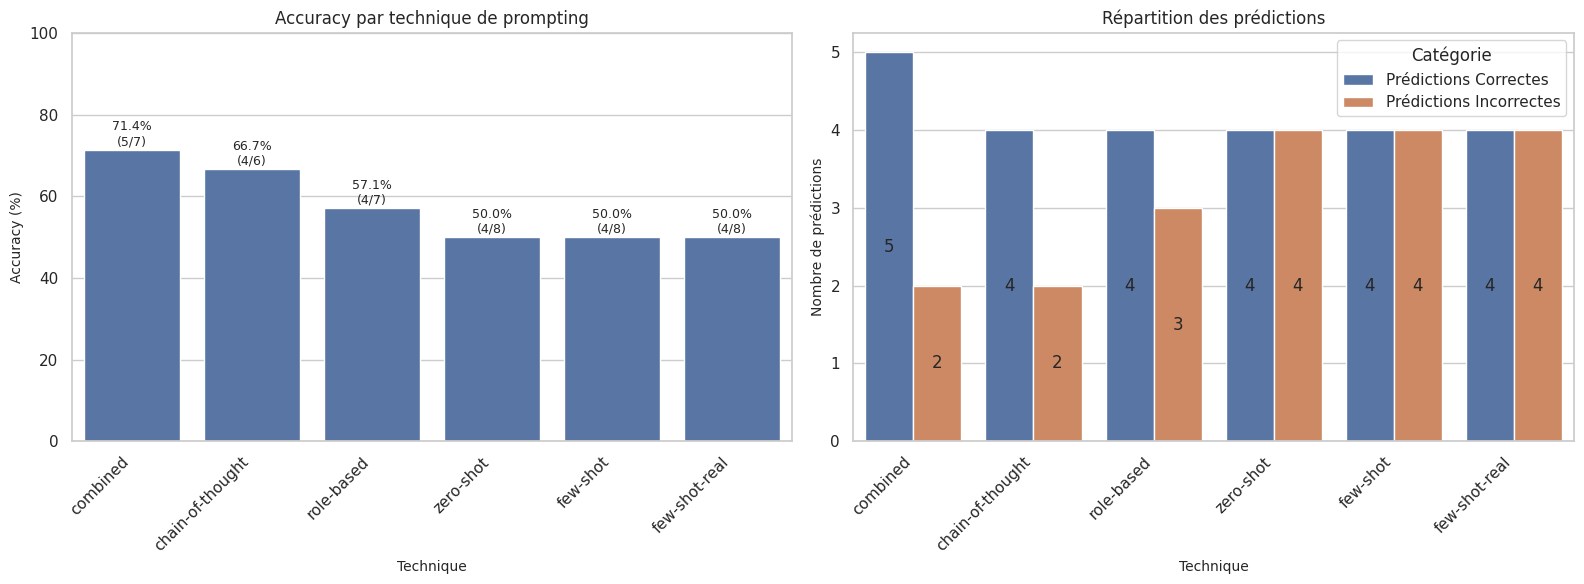

Results saved to CSV files with timestamp 20250410-185856


(           technique  review_id  \
 0          zero-shot        271   
 1           few-shot        271   
 2      few-shot-real        271   
 3   chain-of-thought        271   
 4         role-based        271   
 ..               ...        ...   
 73          few-shot        247   
 74     few-shot-real        247   
 75  chain-of-thought        247   
 76        role-based        247   
 77          combined        247   
 
                                           review_text  true_label  \
 0   Fil #AFP #Energie Correa promet un plan d'expa...           1   
 1   Fil #AFP #Energie Correa promet un plan d'expa...           1   
 2   Fil #AFP #Energie Correa promet un plan d'expa...           1   
 3   Fil #AFP #Energie Correa promet un plan d'expa...           1   
 4   Fil #AFP #Energie Correa promet un plan d'expa...           1   
 ..                                                ...         ...   
 73  Évaluation de stratégies d'adaptation de la vi...           1   
 74  É

In [ ]:
run_evaluation()

___
### 🧪🏠 Test avec 100 exemples

Choisissez un modèle de votre choix et lancez l'évaluation en vous basant sur un plus grand nombre d'exemples.  
Vu la longueur que cela peut prendre, si vous utilisez des solutions gratuites et non payantes, je vous conseille plutôt de le faire chez vous. Vous pouvez néanmoins voir ici le résultat de mes analyses :

___


Aucun dataset fourni, chargement automatique du dataset tweet...

Taille du dataset Tweet Sentiment: 1839 exemples d'entraînement, 324 exemples de test

Exemples du dataset Tweet Sentiment:


,text,label
0,"A Fukushima, la radioactivité met à mal la bio...",0
1,Biodiversité et développement durable : la pet...,1
2,Des aides du #gouvernement pour des #logements...,2



Evaluating 6 prompting techniques on 100 examples from Tweets dataset...
Using gpt4mini model...


Processing samples:   0%|          | 0/100 [00:00<?, ?it/s]


Sample of Individual Results:


,technique,review_text,true_label,predicted_label,correct,retry_count
0,zero-shot,"Rencontres écologiques d'été du 30 août 2014, ...",1,1,True,0
1,few-shot,"Rencontres écologiques d'été du 30 août 2014, ...",1,1,True,0
2,few-shot-real,"Rencontres écologiques d'été du 30 août 2014, ...",1,1,True,0
3,chain-of-thought,"Rencontres écologiques d'été du 30 août 2014, ...",1,1,True,0
4,role-based,"Rencontres écologiques d'été du 30 août 2014, ...",1,1,True,0



Examples of Incorrect Predictions:


,technique,review_text,true_label,predicted_label
322,role-based,@user @user écologie a 2 balles. Ils voient mê...,1,0
113,combined,"Nouvelle centrale photovoltaïque à Fukushima, ...",1,2
552,zero-shot,Impact du changement climatique sur l’eau http,0,1



Summary Metrics:


,technique,Accuracy,Correct_Predictions,Incorrect_Predictions,Total_Processed,Total_Examples,Success_Rate
0,zero-shot,61.0,61,39,100,100,100.0
1,few-shot,57.0,57,43,100,100,100.0
2,few-shot-real,65.0,65,35,100,100,100.0
3,chain-of-thought,69.0,69,31,100,100,100.0
4,role-based,60.0,60,40,100,100,100.0
5,combined,68.0,68,32,100,100,100.0


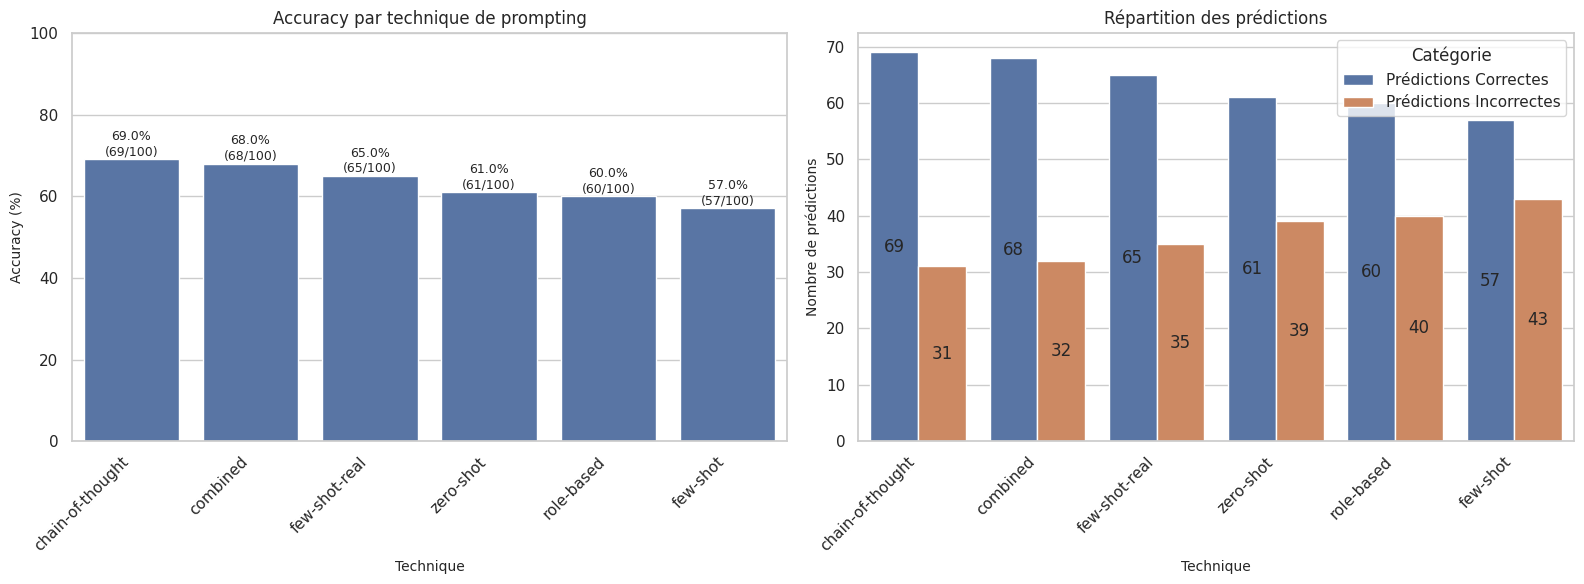

Results saved to CSV files with timestamp 20250410-194614


(            technique  review_id  \
 0           zero-shot         70   
 1            few-shot         70   
 2       few-shot-real         70   
 3    chain-of-thought         70   
 4          role-based         70   
 ..                ...        ...   
 595          few-shot        154   
 596     few-shot-real        154   
 597  chain-of-thought        154   
 598        role-based        154   
 599          combined        154   
 
                                            review_text  true_label  \
 0    Rencontres écologiques d'été du 30 août 2014, ...           1   
 1    Rencontres écologiques d'été du 30 août 2014, ...           1   
 2    Rencontres écologiques d'été du 30 août 2014, ...           1   
 3    Rencontres écologiques d'été du 30 août 2014, ...           1   
 4    Rencontres écologiques d'été du 30 août 2014, ...           1   
 ..                                                 ...         ...   
 595  France Ecologie Energie » vous informe sur l'a...  

In [ ]:
run_evaluation()


### 🏠 Pour aller plus loin (chez vous)

La fonction `run_evaluation` inclut un paramètre `show_confusion_matrix=False`. Activez-le pour découvrir des métriques avancées d'évaluation:

- **Précision**: exactitude des prédictions positives
- **Rappel**: couverture des cas positifs réels
- **F1-score**: équilibre entre précision et rappel

Ces métriques, calculées à partir de la matrice de confusion, offrent une analyse plus fine que la simple accuracy.

**À essayer:** Relancez votre code avec `show_confusion_matrix=True` et comparez les performances des techniques de prompting selon ces nouvelles métriques.

En savoir plus sur [la précision, le rappel](https://fr.wikipedia.org/wiki/Pr%C3%A9cision_et_rappel) et [la F-mesure](https://fr.wikipedia.org/wiki/F-mesure)
____

# 💰 Analyse des coûts

Le coût d'utilisation de l'API GPT-3.5 Turbo est calculé selon la formule:

\$$\text{Coût} = (\text{Tokens d'entrée} \times \text{Tarif d'entrée}) + (\text{Tokens de sortie} \times \text{Tarif de sortie})$$

Tarifs actuels de GPT-3.5 Turbo:

- $0.0005 par 1 000 tokens d'entrée

- $0.0015 par 1 000 tokens de sortie


Pour voir comment le texte est divisé en tokens: [OpenAI Tokenizer](https://platform.openai.com/tokenizer)


## Coût par requête

Avec 264 tokens d'entrée et 6 tokens de sortie:

**Coût d'entrée**:
\$$264 \times \frac{\$0.0005}{1000} = \$0.000132$$

**Coût de sortie**:
\$$6 \times \frac{\$0.0015}{1000} = \$0.000009$$

**Coût total**:
\$$\$0.000132 + \$0.000009 = \$0.000141$$

par requête (soit $0.0141$ centimes)


## Coût pour plusieurs évaluations

Dans notre atelier, chaque exécution de `run_evaluation` utilise $6$ techniques de prompting différentes.

**Pour 10 exemples** :
\$10 \text{ exemples} \times 6 \text{ techniques} = 60 \text{ requêtes}\$

\$60 \text{ requêtes} \times 0.000141 \text{ USD} = \boxed{0.00846} \text{ USD}\$

(moins d'un centime)

**Pour 100 exemples** :
\$100 \text{ exemples} \times 6 \text{ techniques} = 600 \text{ requêtes}\$

\$600 \text{ requêtes} \times 0.000141 \text{ USD} = \boxed{0.0846} \text{ USD}\$

(environ 8.5 centimes)



### 🧪🏠 Exercice pratique : GPT-4.5 Preview Coût

Rendez-vous sur [website OPENAI](https://platform.openai.com/docs/overview) pour découvrir les **tarifs actuels du modèle GPT-4.5 Preview**.

Repérez le modèle GPT-4.5 Preview et identifiez son tarif par million de tokens.


Voici les informations utiles :

💸 Tarifs de GPT-4.5 Preview

- **Input** : 75 $/1M tokens  

- **Output** : 150 $/1M tokens  

➡️ Calculez :

- Le coût d'une requête unique avec GPT-4.5 Preview.

- Le coût total pour exécuter la fonction run_evaluation sur 100 exemples.


<details>
<summary>Solution</summary>

📊 Calcul du coût pour une requête
Prenons l’exemple suivant :

264 tokens d’entrée

6 tokens de sortie

Coût d’entrée :
$264 \times \frac{75}{1,000,000} = 0.0198\ \text{USD}$

Coût de sortie :
$6 \times \frac{150}{1,000,000} = 0.0009\ \text{USD}$

Coût total par requête :
$0.0198 + 0.0009 = \boxed{0.0207\ \text{USD}}$

(soit 2.07 centimes)

💡 Coût total pour run_evaluation sur 100 exemples
Chaque appel de run_evaluation utilise 6 techniques de prompting.
Donc pour 100 exemples :

$100 \text{ exemples} \times 6 \text{ techniques} = 600 \text{ requêtes}$

Coût total :
$600 \times 0.0207 = \boxed{12.42\ \text{USD}}$


</details>

___

# 🏠 Pour les plus curieux : modèles locaux

Nous avons exploré l'utilisation des modèles via API et interfaces de chat.  
Si vous disposez d’un ordinateur suffisamment puissant, vous pouvez également expérimenter avec des modèles d’IA installés localement.

Je vous recommande de découvrir [Ollama](https://ollama.com/), une solution légère mais performante pour exécuter des modèles en local.

**Guide vidéo d'installation** :  
https://www.youtube.com/watch?v=UtSSMs6ObqY&ab_channel=TechWithTim

Ollama est un outil gratuit et open-source conçu pour exécuter des modèles de langage (LLMs) localement sur des ordinateurs personnels ou des serveurs. Il agit comme un gestionnaire de modèles local et un environnement d'exécution, permettant aux utilisateurs de télécharger, gérer et interagir avec des LLMs open-source sans dépendre des services basés sur le cloud.

---

## Avantages de l’exécution locale

- Confidentialité accrue des données  
- Pas de coût d’API  
- Utilisable sans connexion internet  

---

### 🧪🏠 Exercice pratique : Évaluation locale avec Ollama


**Objectif :**  
Appliquer les fonctions du workshop pour lancer une évaluation locale en utilisant **Ollama installé sur votre ordinateur**.

**Tâche :**  
Reprenez les fonctions vues dans l’atelier et adaptez-les pour effectuer une évaluation locale sur **au moins 100 exemples**.  

Utilisez un modèle que vous avez téléchargé avec Ollama.

**Installation locale :**  

Après avoir installé Ollama et téléchargé un modèle (par exemple `llama3.2`), vous pouvez l’utiliser dans votre éditeur de code local (PyCharm, VS Code, IDLE, etc.).

Resources :  [website](https://ollama.com/)

**Installation Google Colab :**  

Pour utiliser Ollama dans Google Colab, vous devez :
1. Avoir Ollama installé et fonctionnel sur votre machine locale
2. Avoir le modèle llama3.2 téléchargé (commande : `ollama pull llama3.2`)
3. Exécuter le serveur Ollama en arrière-plan (commande : `ollama serve`)

Exécutez la cellule ci-dessous pour installer les dépendances.


In [ ]:
# Installer les dépendances nécessaires
!pip install colab-xterm
%load_ext colabxterm

# Lancer un terminal virtuel dans Colab
%xterm

# Dans le terminal qui s'ouvre, exécutez ces commandes (une par une) :
# curl https://ollama.ai/install.sh | sh
# ollama serve &
# ollama pull llama3.2

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

Launching Xterm...

<IPython.core.display.Javascript object>

In [ ]:
import requests
import json

def call_ollama_api(prompt: str, temperature: float = 0.1, model: str = "llama3.2"):
    """
    Appelle Ollama via son API REST directement.
    """
    try:
        url = "http://localhost:11434/api/generate"

        payload = {
            "model": model,
            "prompt": prompt,
            "temperature": temperature,
            "stream": False
        }

        response = requests.post(url, json=payload)
        response.raise_for_status()

        result = response.json().get("response", "")
        return result.strip()

    except Exception as e:
        return f"Erreur: {e}"

prompt = "Qu'est-ce que c'est ollama?"
response = call_ollama_api(prompt)
print(f"📜 Prompt: {prompt}")
print(f"📝 Réponse: {response}")

📜 Prompt: Qu'est-ce que c'est ollama?
📝 Réponse: Ollama est une langue créée par le compositeur et musicien français Laurent Boutonnat. Elle est basée sur les principes de la langue, mais elle est également très différente de celle-ci.

La langue Ollama a été créée dans les années 1990, et son objectif principal était de créer une langue qui soit à la fois simple et complexe en même temps. C'est-à-dire que les règles de base sont simples, mais qu'elle peut également être très nuancée.

La caractéristique clé du langage Ollama est qu'elle utilise des prépositions et des verbes qui sont très similaires aux mots français, mais avec une signification différente. Par exemple, le mot "o" dans Ollama a une signification complètement différente de celle du mot similaire en français.

Malheureusement, je n'ai pas trouvé beaucoup d'informations sur la langue Ollama, et il semble que cela ne soit qu'une petite communauté qui l'utilise. Cependant, si vous voulez apprendre cette langue ou en savoir

___
# 📚 Ressources additionnelles

Pour allez plus loin, vous pouvez envisager la lecture de ces ressources :

1. **Prompt Engineering Guide** : [https://github.com/dair-ai/Prompt-Engineering-Guide](https://github.com/dair-ai/Prompt-Engineering-Guide)  
   *Elvis Saravia, 2022. MIT License.*  
   Un guide complet sur le Prompt Engineering, maintenu par la communauté Dair.AI.

2. **Speech and Language Processing** : [Model Alignment, Prompting, and In-Context Learning (PDF)](https://web.stanford.edu/~jurafsky/slp3/12.pdf)  
   *Daniel Jurafsky & James H. Martin. Draft of January 12, 2025.*  
   Un chapitre détaillé sur le prompting et les modèles alignés, tiré de l’ouvrage de référence sur le traitement automatique du langage.

3. **The Prompt Report: A Systematic Survey of Prompting Techniques** : [https://arxiv.org/pdf/2406.06608](https://arxiv.org/pdf/2406.06608)  
   *Schulhoff, Sander, et al.*  
   Ce rapport de recherche fournit un **overview détaillé des techniques de prompting actuelles**.

4. **A Survey of Large Language Models** : [https://arxiv.org/pdf/2307.06435](https://arxiv.org/pdf/2307.06435)  
   *Naveed, Humza, et al.*  
   Ce rapport de recherche présente une **vue d’ensemble des grands modèles de langage** actuellement disponibles, avec leurs forces et limitations.

5. **OpenAI Cookbook** : [https://cookbook.openai.com/](https://cookbook.openai.com/)  
   Le **Cookbook d'OpenAI** est une ressource pratique regroupant des exemples de code, des cas d’usage et des conseils pour **utiliser efficacement les modèles d’OpenAI**.


___


#`End` 🏆 🎉 😊

<p xmlns:cc="http://creativecommons.org/ns#">
  This material is created by
  <a href="https://www.linkedin.com/in/mikhail-biriuchinskii/" target="_blank" rel="noopener noreferrer">
    Mikhail BIRIUCHINSKII
  </a>, it's distributed under the terms of the Creative Commons license
  <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer">
    CC BY-NC-SA 4.0
  </a>
  <img style="height:11px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1">
  <img style="height:11px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1">
  <img style="height:11px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1">
  <img style="height:11px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1">
</p>


